In [41]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AviationData.csv')

In [3]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,31587.000000,3.157800e+04,80399.000000,58158.000000,55466.000000,56695.000000,71092.000000
mean,37.455487,-2.655576e+03,1.147564,0.847037,0.330833,0.521104,6.131393
std,12.519763,4.553227e+05,0.446792,6.291200,1.367596,2.878535,30.180326
min,-78.016945,-8.091184e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.269167,-1.147209e+02,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.091111,-9.431139e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.505139,-8.164129e+01,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,4.358333e+02,8.000000,349.000000,111.000000,380.000000,699.000000


In [4]:
df.shape #(#Rows, #Columns)

(85976, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

In [6]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df ['Event.Date'].dt.month_name()
df['Day'] = df ['Event.Date'].dt.day_name()

In [8]:
# Read Headers
print(df.columns)
#Read each column
print(df[['LOCATION', 'Country', 'Make']])
# Read each Row 
print(df.head(4))
#OR 
print(df.iloc[1:23]) # <----------- This is used to look up multiple rows 
#Read a specific location (Row,Column)
print(df.iloc[2,1])

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'LOCATION', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'Month', 'Day'],
      dtype='object')
                 LOCATION        Country      Make
0          JANESVILLE, WI  United States  Velocity
1           St Thomas, CB  United States      Bell
2              TYONEK, AK  United States     Maule
3      PRAIRIE DU SAC, WI  United States    Cessna
4         LAKE PLACID, FL  United States     Piper
...                   ...            ...  

In [9]:
df.loc[df['LOCATION'] == 'LAKE PLACID, FL'] #Finding specific data that isn't just integer based 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Day
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,2021,February,Wednesday
17732,20100522X45543,Accident,ERA10CA279,2010-05-22,"LAKE PLACID, FL",United States,27.290000,-81.360000,NONE,Sunray Airstrip,...,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,20-12-2010,2010,May,Saturday
18505,20091103X65043,Accident,ERA10CA046,2009-11-03,"LAKE PLACID, FL",United States,27.269723,-81.188611,NaN,NaN,...,NaN,1.0,1.0,VMC,NaN,Probable Cause,03-03-2010,2009,November,Tuesday
20009,20090210X85716,Accident,ERA09CA159,2009-02-07,"LAKE PLACID, FL",United States,27.245555,-81.413056,09FA,Placid Lakes Airport,...,NaN,NaN,3.0,VMC,Landing,Probable Cause,06-05-2009,2009,February,Saturday
21207,20080710X01004,Accident,NYC08LA221,2008-06-20,"LAKE PLACID, FL",United States,27.245555,-81.413056,09FA,Placid Lakes,...,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,25-06-2009,2008,June,Friday
30335,20031016X01744,Accident,ATL04LA007,2003-10-05,"LAKE PLACID, FL",United States,27.250000,-81.466667,NaN,NaN,...,NaN,NaN,3.0,VMC,Maneuvering,Probable Cause,28-04-2005,2003,October,Sunday
31727,20030306X00297,Accident,MIA03LA073,2003-03-05,"LAKE PLACID, FL",United States,27.233333,-81.332778,NaN,Lake Persimmon,...,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,23-07-2003,2003,March,Wednesday
33003,20020712X01102,Accident,MIA02LA121,2002-07-04,"LAKE PLACID, FL",United States,27.353056,-81.408056,O3FA,Lake Persimmon Airstrip,...,NaN,1.0,NaN,VMC,Approach,Probable Cause,23-10-2002,2002,July,Thursday
37451,20001212X21153,Accident,ATL00LA058,2000-06-05,"LAKE PLACID, FL",United States,NaN,NaN,NaN,NaN,...,0.0,2.0,0.0,VMC,Approach,Probable Cause,18-01-2001,2000,June,Monday
37955,20001212X20697,Accident,MIA00LA112,2000-03-19,"LAKE PLACID, FL",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,29-11-2000,2000,March,Sunday


In [10]:
#SORTING/ DESCRIBING 
#df.sort_values(['Event.Date']) #This is for Ascending
df.sort_values(['Event.Date'], ascending = False) #This is for descending

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Day
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,2021,February,Tuesday
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,2021,February,Monday
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,2021,February,Saturday
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,0.0,0.0,1.0,VMC,NaN,NaN,NaN,2021,February,Friday
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,2021,February,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980,1979,August,Thursday
85972,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,June,Sunday
85973,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,August,Friday
85974,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,July,Thursday


In [11]:
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Day
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,2021,February,Tuesday
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,2021,February,Monday
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,2021,February,Saturday


In [12]:
df['Total.Injuries'] = df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] 

In [31]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Day,Total.Injuries
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,0.0,0.0,VMC,NaN,NaN,NaN,2021,February,Tuesday,0.0
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,0.0,0.0,VMC,NaN,NaN,NaN,2021,February,Monday,0.0
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,2.0,0.0,NaN,NaN,NaN,NaN,2021,February,Saturday,2.0
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,0.0,1.0,VMC,NaN,NaN,NaN,2021,February,Friday,0.0
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,2021,February,Wednesday,1.0


In [30]:
df.columns?

In [28]:
Test = pd.notnull(df['Total.Injuries']) 

NameError: name 'false' is not defined

In [27]:
Test.head(4) #THIS IS NOT WHAT I WANTED 

0    True
1    True
2    True
3    True
Name: Total.Injuries, dtype: bool

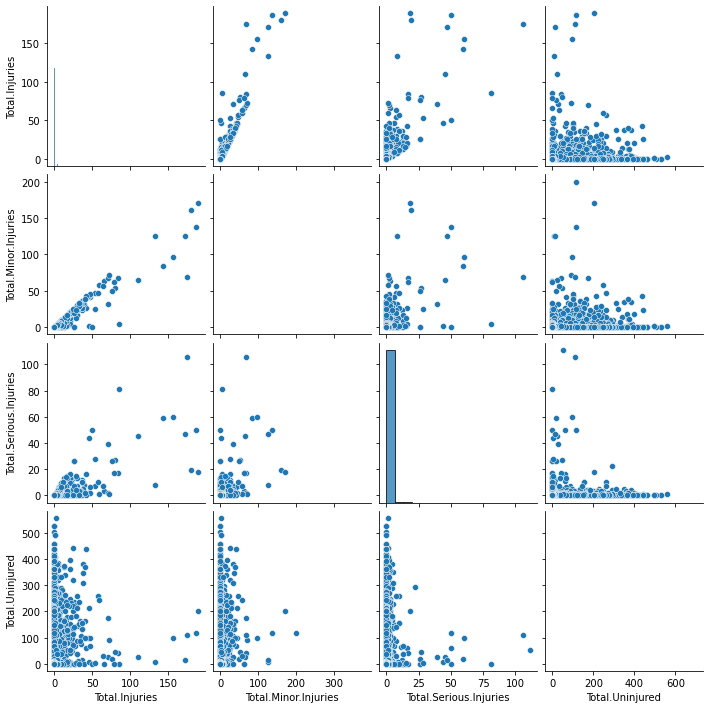

In [24]:
sns.pairplot(df[["Event.Date","Total.Injuries","Total.Minor.Injuries","Total.Serious.Injuries","Total.Uninjured",]])

In [42]:
plt.figure(figsize=(8,8))
seaborn.heatmap(df.corr(), annot=True , cmap="coolwarm")

TypeError: 'module' object is not callable